# **AdaBoost**
##### Ama kaggle'dan bu metot için en iyi modellerden birini bulup hile yaptığım versiyonu

## Import & Data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
df = pd.read_csv("mushrooms.csv")

Özellik Bilgileri:

1. cap-shape: kapak şekli: çan=b,konik=c,dışbükey=x,düz=f, topuzlu=k,batık=s
2. cap-surface: kapak yüzeyi: lifli=f,oluklar=g,pullu=y,pürüzsüz=s
3. cap-color: kapak rengi: kahverengi=n,devetüyü=b,tarçın=c,gri=g,yeşil=r, pembe=p,mor=u,kırmızı=e,beyaz=w,sarı=y
4. bruises?: morluklar?: morluklar=t,hayır=f
5. odor: koku: badem=a,anason=l,kreozot=c,balık=y,faul=f, küf=m,yok=n,keskin=p,baharatlı=s
6. gill-attachment: solungaç eki: ekli=a,azalan=d,serbest=f,çentikli=n
7. gill-spacing: solungaç aralığı: yakın=c,kalabalık=w,uzak=d
8. gill-size: solungaç boyutu: geniş=b,dar=n
9. gill-color: solungaç rengi: siyah=k,kahverengi=n,buff=b,çikolata=s,gri=g, yeşil=r,turuncu=o,pembe=p,mor=u,kırmızı=e, beyaz=w, sarı=y
10. stalk-shape: sap şekli: büyütme=e,konikleşme=t
11. stalk-root: sap-kök: soğanlı=b,kulüp=c,cup=u,equal=e, rhizomorphs=z,rooted=r,eksik=?
12. stalk-surface-above-ring: sap-yüzey-üstü-halka: lifli=f,pullu=y,ipeksi=k,pürüzsüz=s
13. stalk-surface-below-ring: halka altı sap yüzeyi: lifli=f,pullu=y,ipeksi=k,pürüzsüz=s
14. stalk-color-above-ring: sap-renk-üstünde-halka: kahverengi=n,devetüyü=b,tarçın=c,gri=g,turuncu=o, pembe=p,kırmızı=e,beyaz=w,sarı=y
15. stalk-color-below-ring: halka-renk altı: kahverengi=n,devetüyü=b,tarçın=c,gri=g,turuncu=o, pembe=p,kırmızı=e,beyaz=w,sarı=y
16. veil-type:peçe tipi: kısmi=p,evrensel=u
17. veil-color:peçe rengi: kahverengi=n,turuncu=o,beyaz=w,sarı=y
18. ring-type: zil numarası: yok=n,bir=o,iki=t
19. halka tipi: örümcek ağı=c,geçici=e,flaring=f,büyük=l, yok=n,pendant=p,kılıflama=s,zone=z
20. spore-print-color: spor-baskı-renk: siyah=k,kahverengi=n,buff=b,çikolata=s,yeşil=r, turuncu=o,mor=u,beyaz=w,sarı=y
21. population: popülasyon: bol=a,kümelenmiş=c,sayısız=n, dağınık=s,birkaç=v,yalnız=y
22. habitat: habitat: çimenler=g,yapraklar=l,çayırlar=m,yollar=p, kentsel=u,atık=w,ağaçlar=d

---
## EDA

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [32]:
df.isnull().sum().sum()

0

In [33]:
df.isna().sum().sum()
# Aynı işleve sahipler

0

In [34]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [35]:
df.describe().transpose()
# Daha rahat göstermek için transpose aldık
#  Hangi değişken daha çok tkilidir?

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [36]:
df.describe().T.sort_values(by='unique')

,count,unique,top,freq
veil-type,8124,1,p,8124
class,8124,2,e,4208
bruises,8124,2,f,4748
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
stalk-shape,8124,2,t,4608
ring-number,8124,3,o,7488
cap-surface,8124,4,y,3244
veil-color,8124,4,w,7924


In [37]:
df.iloc[12]

class                       e
cap-shape                   b
cap-surface                 s
cap-color                   y
bruises                     t
odor                        a
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  w
stalk-shape                 e
stalk-root                  c
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           n
population                  s
habitat                     g
Name: 12, dtype: object

In [38]:
pd.concat({"Eşsiz Değer" : df.apply(pd.unique), "Sayısı": df.nunique()}, axis=1)

,Eşsiz Değer,Sayısı
class,"[p, e]",2
cap-shape,"[x, b, s, f, k, c]",6
cap-surface,"[s, y, f, g]",4
cap-color,"[n, y, w, g, e, p, b, u, c, r]",10
bruises,"[t, f]",2
odor,"[p, a, l, n, f, c, y, s, m]",9
gill-attachment,"[f, a]",2
gill-spacing,"[c, w]",2
gill-size,"[n, b]",2
gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]",12


<AxesSubplot:xlabel='class', ylabel='count'>

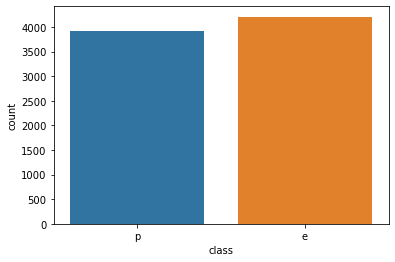

In [39]:
sns.countplot(data=df, x="class")

In [40]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

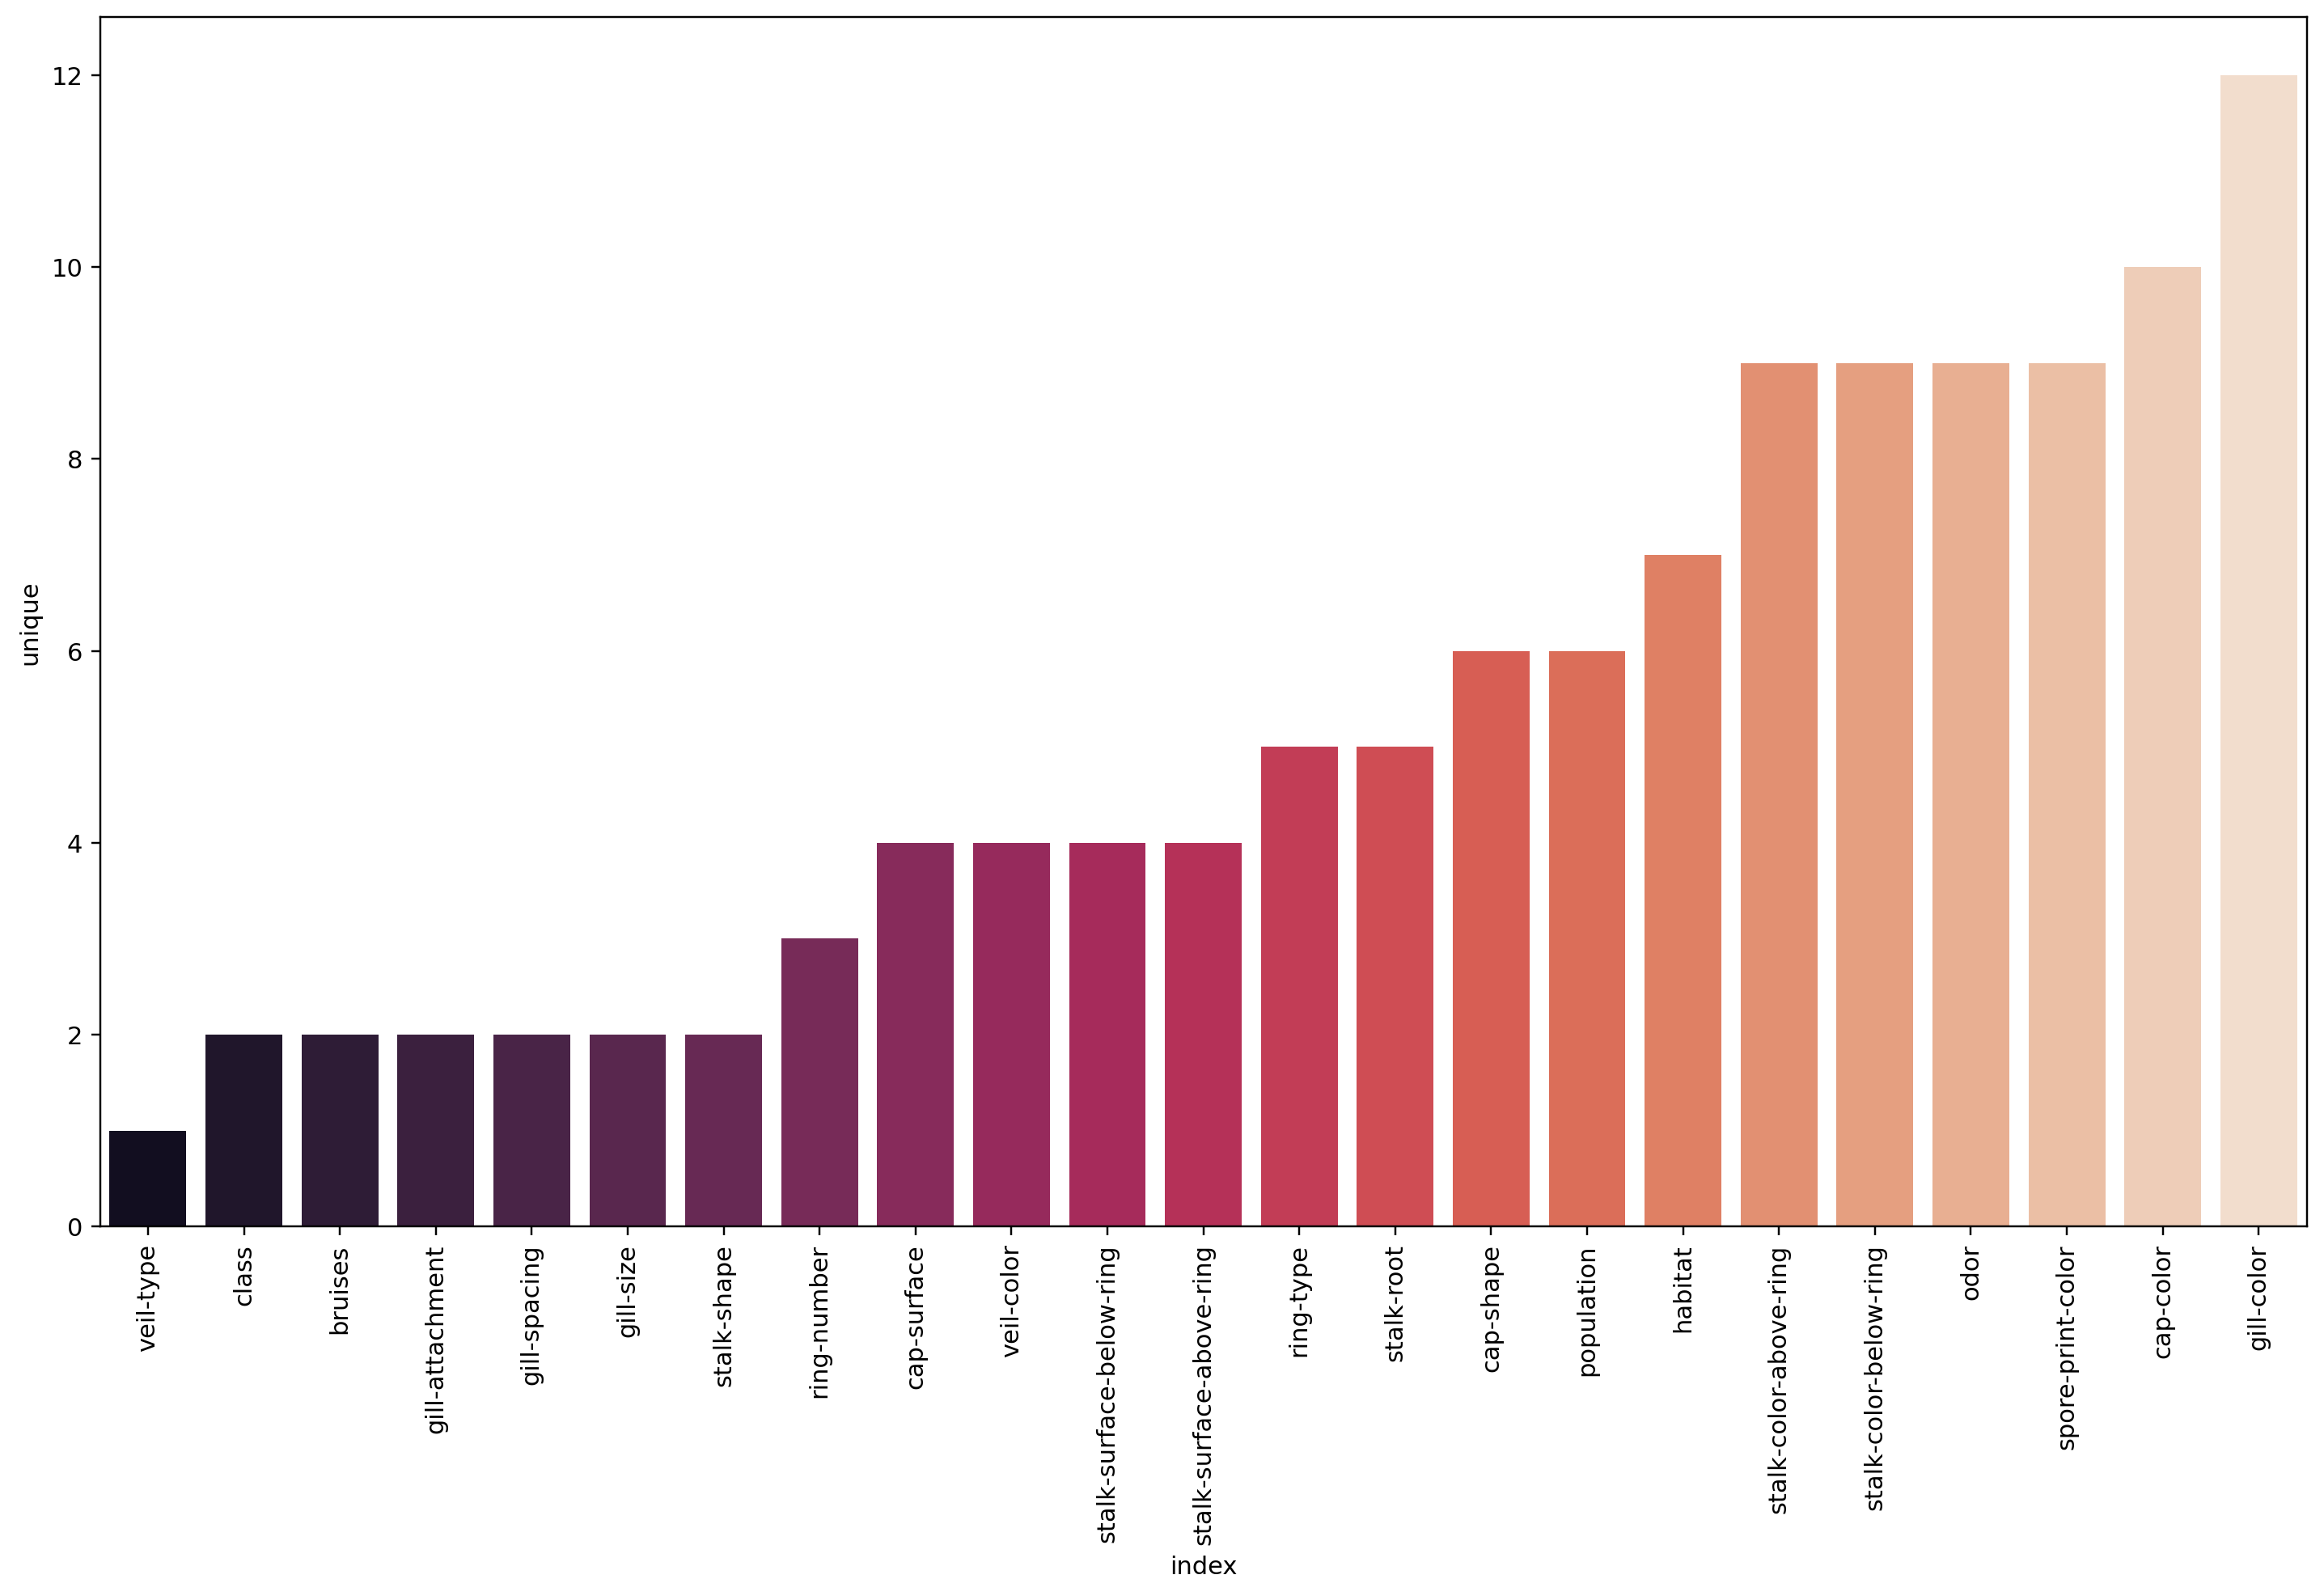

In [41]:
plt.figure(figsize=(16,9), dpi=220)
sns.barplot(data=df.describe().transpose().reset_index().sort_values("unique"),
 x = "index", y="unique", palette="rocket")
plt.xticks(rotation=90);
# https://seaborn.pydata.org/tutorial/color_palettes.html

---
## Train Test Split

In [42]:
X = df.drop("class", axis = 1)
y = df["class"]

In [43]:
X = pd.get_dummies(X,drop_first=True)

In [44]:
X.columns
# veil type tamamen tek bir değişkenden oluştuğu için burada ...
# ..herhangi bir ağırlığı olmayacak. Bu sebeple düşürüldü

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.1, random_state=9)

---
## Modelleme

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
model = AdaBoostClassifier(n_estimators=3)
model.fit(X_train, y_train)
## Dummy Variable olmazsa burada hata verir

AdaBoostClassifier(n_estimators=3)

In [49]:
mantar_pred = model.predict(X_test)

---
## Değerlendirme

In [50]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

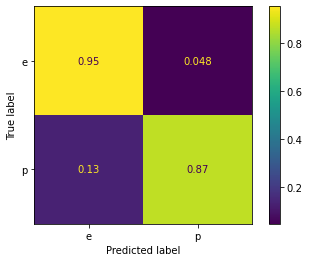

In [51]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize="true")

In [52]:
print(classification_report(y_test, mantar_pred))

              precision    recall  f1-score   support

           e       0.90      0.95      0.93       457
           p       0.93      0.87      0.90       356

    accuracy                           0.91       813
   macro avg       0.92      0.91      0.91       813
weighted avg       0.91      0.91      0.91       813



---
## Modeli iyileştirmek

In [53]:
# df_sample = df.sample(frac=0.05, random_state=9)
# df_sample.info()

In [54]:
# X = df_sample.drop("class", axis = 1)
# X = pd.get_dummies(X,drop_first=True)
# y = df_sample["class"]

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#  test_size=0.3, random_state=9)

In [55]:
hata_orani = []

for mantar_est in range(1,30):
    model = AdaBoostClassifier(n_estimators=mantar_est)
    model.fit(X_train, y_train)
    mantar_deneme_pred = model.predict(X_test)
    
    hata = 1 - accuracy_score(y_test, mantar_deneme_pred)
    hata_orani.append(hata)
## Çalışma süresi benim pc'de ortalama 30 dk sürüyor
## google Colab'de 24 saniye

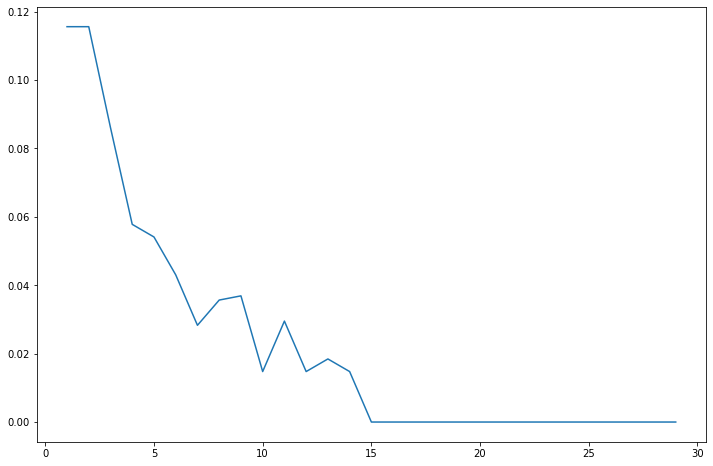

In [56]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30), hata_orani);

(-0.01, 0.04)

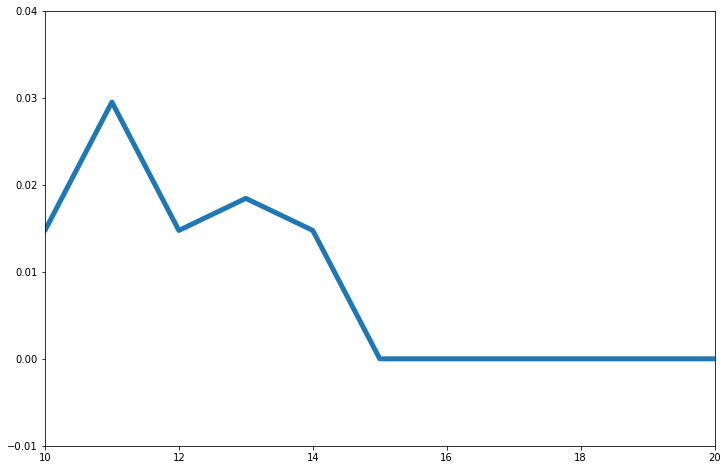

In [57]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30), hata_orani, lw=5)
plt.xlim(10,20)
plt.ylim(-0.01,0.04)

In [58]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.        , 0.        , 0.06896552, 0.03448276, 0.        ,
       0.        , 0.        , 0.06896552, 0.10344828, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06896552, 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06896552, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.        , 0.        , 0.     

In [59]:
feature_df= pd.DataFrame(index= X.columns, columns=["Özellik Katsayısı"], data=model.feature_importances_)
feature_df

,Özellik Katsayısı
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [60]:
feature_df = feature_df[feature_df["Özellik Katsayısı"] > 0]
feature_df = feature_df.sort_values("Özellik Katsayısı") # inplace=True da olur
feature_df

,Özellik Katsayısı
odor_c,0.034483
ring-type_p,0.034483
ring-number_t,0.034483
stalk-surface-above-ring_k,0.034483
stalk-surface-below-ring_y,0.034483
odor_p,0.034483
odor_f,0.034483
habitat_w,0.034483
stalk-shape_t,0.068966
population_v,0.068966


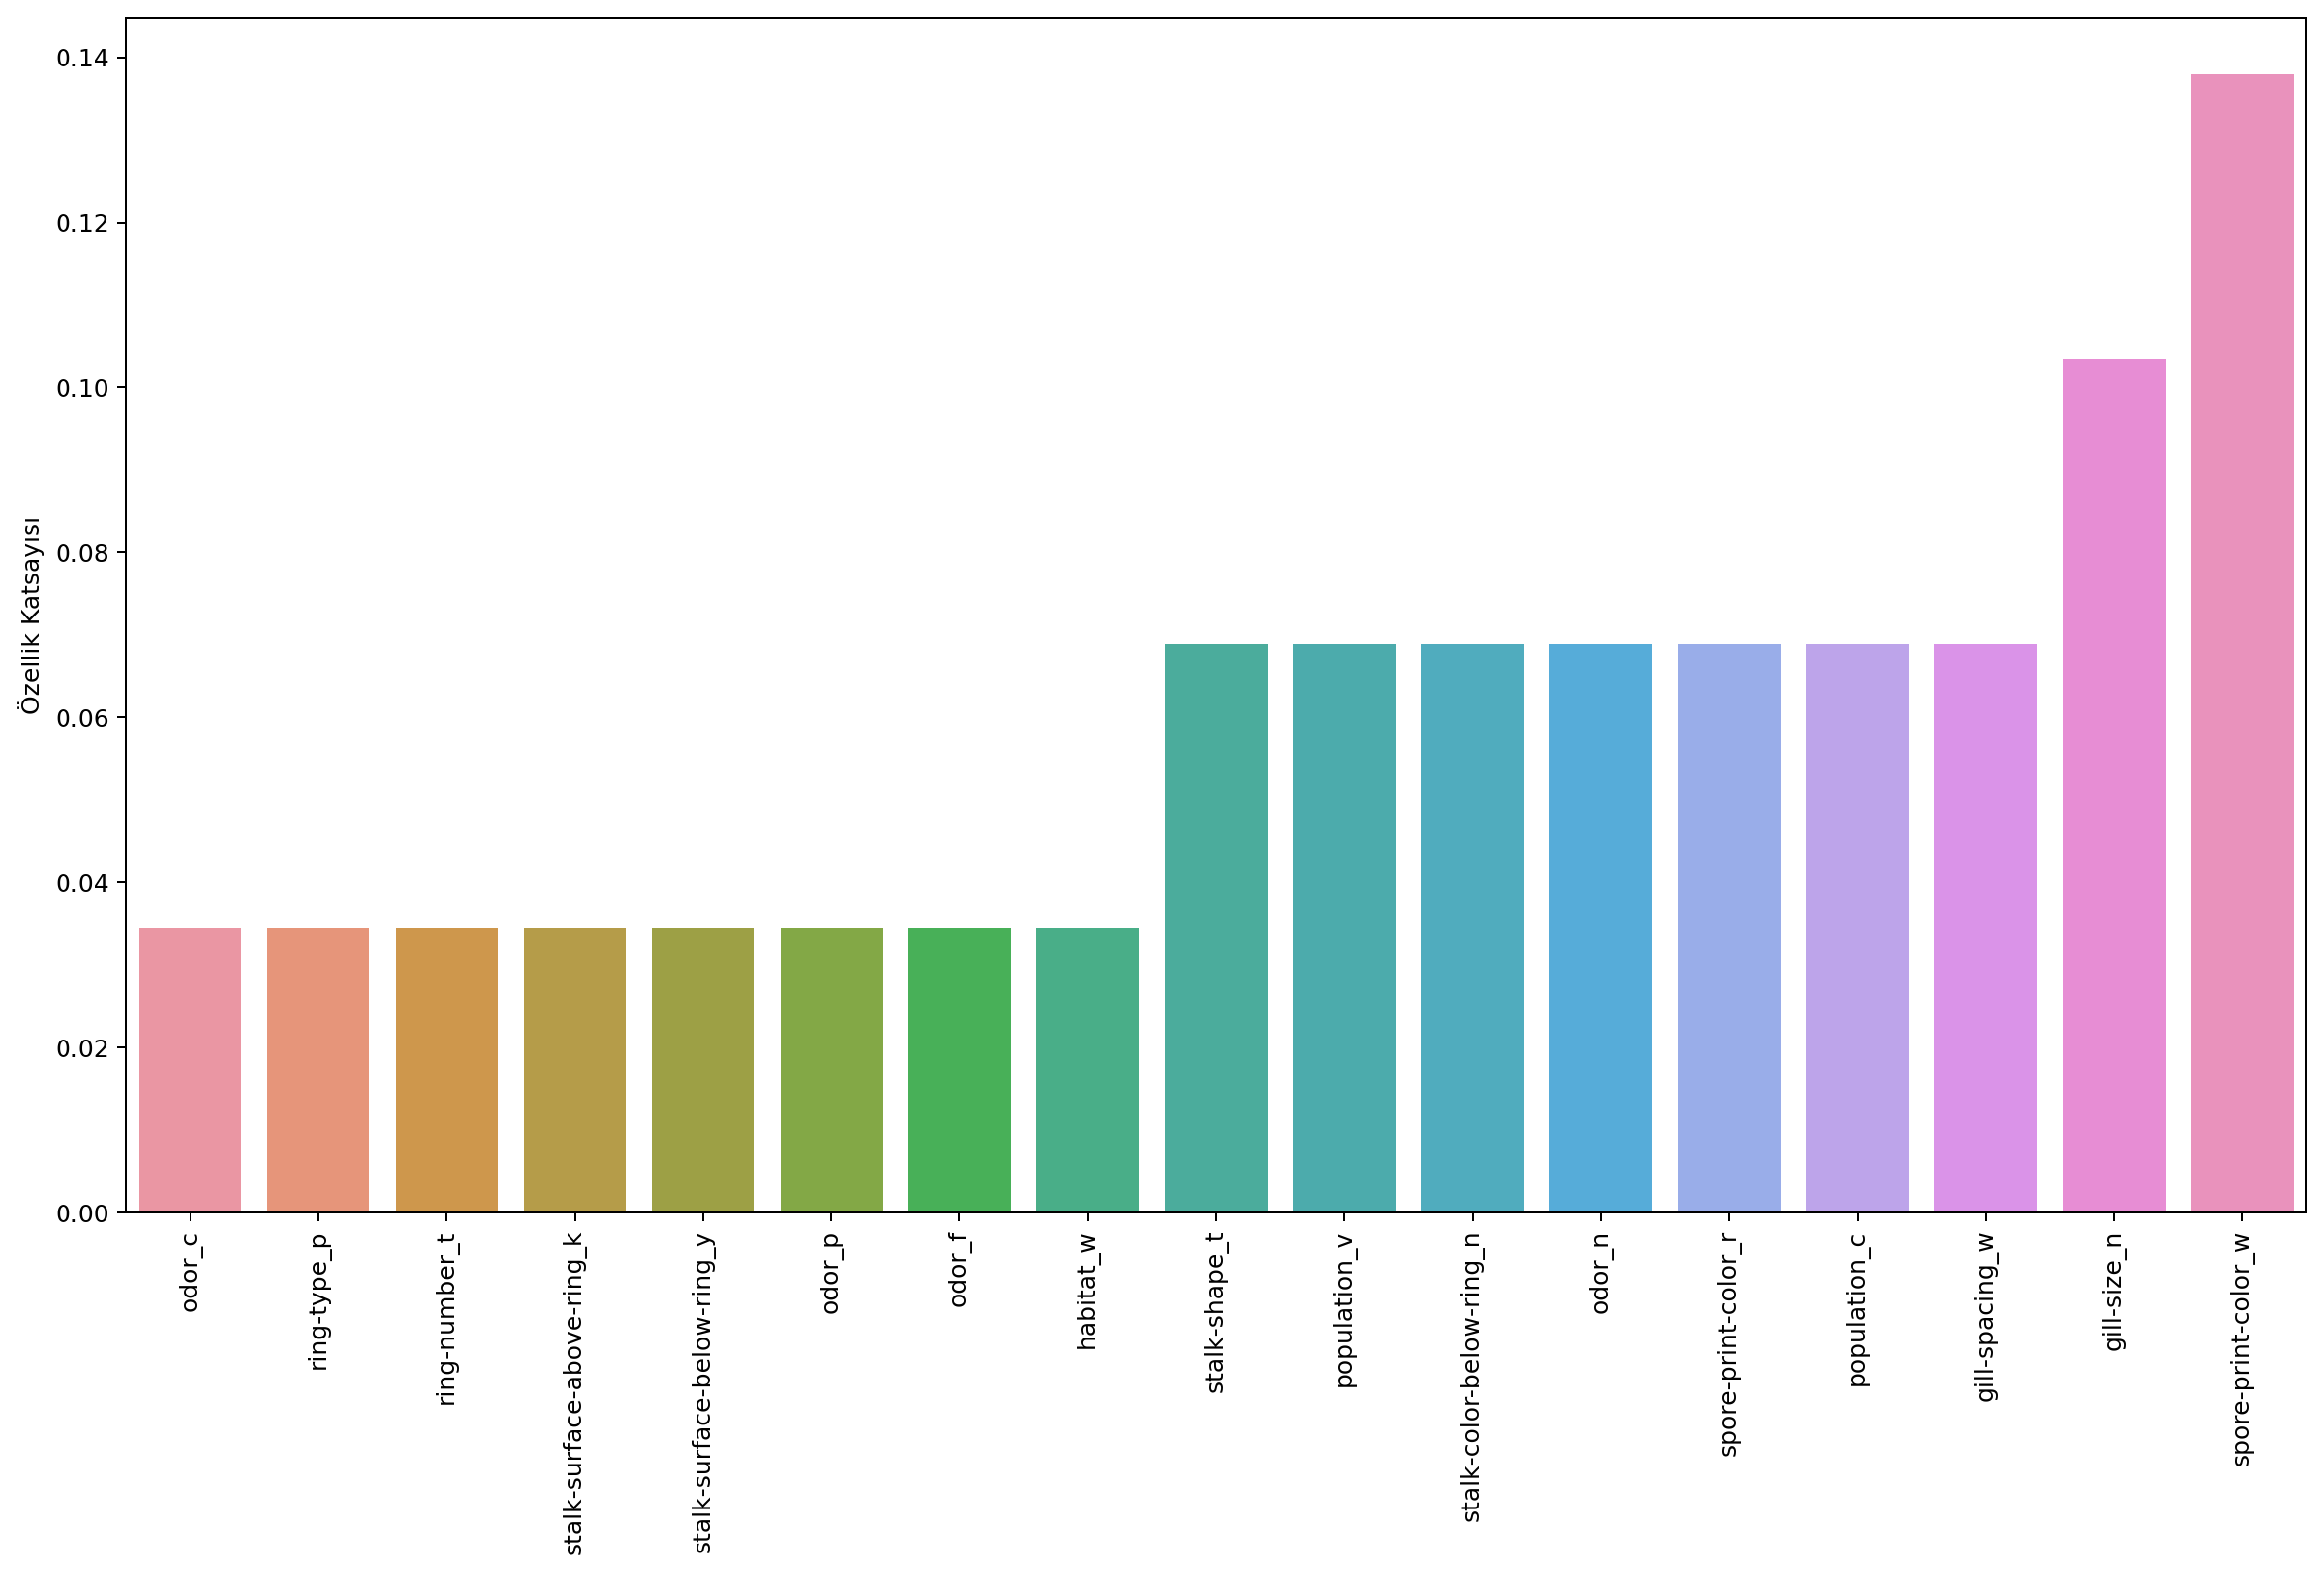

In [61]:
plt.figure(figsize=(16,9), dpi=180)
sns.barplot(x=feature_df.index, y="Özellik Katsayısı" , data = feature_df, )
plt.xticks(rotation=90);

<AxesSubplot:xlabel='odor', ylabel='count'>

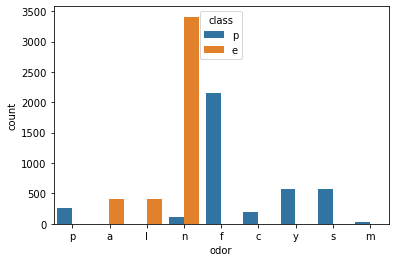

In [62]:
sns.countplot(x="odor", hue="class" ,data=df)

<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

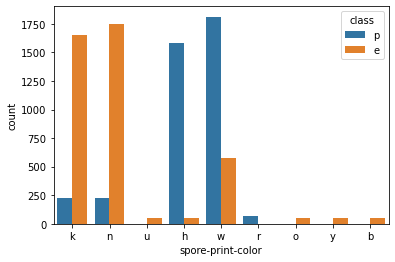

In [63]:
sns.countplot(x="spore-print-color", hue="class" ,data=df)

<AxesSubplot:xlabel='gill-size', ylabel='count'>

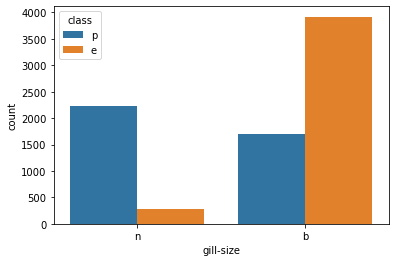

In [64]:
sns.countplot(x="gill-size", hue="class" ,data=df)

---
---
# **https://www.youtube.com/watch?v=5FFuLkymdZc**